# **Maryland Education Spending**


By Samuel Deacon, James Rew, Norman Moon 


---

# **Introduction**



In this project we examinad all 24 school districts in Maryland (23 counties and Baltimore City), and the money they spent on large transactions, deemed by our source as over $25,000. There are many variables in the total calculations of how much money a district can spend on their schools, but in the below graphs and tables we will show a comprehensive way analyse and look at the money spent at each school district and how it changes over the years.

The hope of this project is that the reader has a clear understanding of Maryland's educational spending, where the money goes, and how this varies between counties. School district funding has a large impact on a family or individual, so it is a crucial factor in where people chose where to live. A county that properly spends money on schooling shows that county's commitment and values in regards to public education. 

We will examine relations between Maryland counties in regards to spending and population, and will delve deeper into the data behind Baltimore County Public Schools budget. As former students of the district, we are familiar with the sucessus and failures of our county's education spending, and can use this to provide a unique outlook on the data set found here:
https://opendata.maryland.gov/Education/County-Board-of-Education-Spending-Disclosures/t6vk-rvwe


# **Using the Data**
We begin by using Python 3 and importing a few basic libraries such as pandas, numpy, math, and matplotlib.pyplot. 

As seen below in the table, tha data is sorted by school county in Maryland that had made the purchase, the year the purchase was made, to who the purchase went too and their zip code, and last the amount the purchase was made for. There are some school county's that had filled in the purpose of payment, but that was not consistent with every purchase and for that reason we will filter through the data to make it more readable and maipulate it so we get more specific data for certain county's and certain years. 

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

#data from https://opendata.maryland.gov/Education/County-Board-of-Education-Spending-Disclosures/t6vk-rvwe
#each Maryland county's Education spending disclosure

df = pd.read_csv('https://raw.githubusercontent.com/samfcb28/Maryland_Education_Spending/main/County_Board_of_Education_-_Spending_Disclosures.csv')

df

,Fiscal Year,Agency Name,Payee Name,Payee Zip,Amount,Purpose of Payment (Baltimore County only),MBE
0,2019,Allegany County Public Schools,CITIBANK NA,06152-1328,19914754.00,NaN,NaN
1,2019,Allegany County Public Schools,JEFFERSON SCHOOL - MAIN CAMPUS,21279-0751,3340238.27,NaN,NaN
2,2019,Allegany County Public Schools,MARYLAND STATE RETIREMENT & PENSION SYSTEM,21202,2540451.00,NaN,NaN
3,2019,Allegany County Public Schools,ACT 1ST FEDERAL CREDIT UNION,21502,1920730.52,NaN,NaN
4,2019,Allegany County Public Schools,SCHOOL THERAPY SERVICES,21532,1591892.19,NaN,NaN
...,...,...,...,...,...,...,...
36700,2020,Baltimore County Public Schools,E-ZPASS MD REBILL,21224,27855.00,ERROR: #N/A,NaN
36701,2020,Baltimore County Public Schools,IN *EASTER'S LOCK & KEY,21234,27363.14,ERROR: #N/A,NaN
36702,2020,Baltimore County Public Schools,TEXTBOOK WAREHOUSE,30005,25648.79,ERROR: #N/A,NaN
36703,2020,Baltimore County Public Schools,SANTONI'S MARKET,21071,25478.24,ERROR: #N/A,NaN


# **Tidying up the Data**

Here we are modifiying the titles of the county's listed. Some of them were not the same captilization and was not easy to filter through. Some of the counties were not spelled the same way consistenly as well, for example some "Montgomery County Public School" were spelled with an 's' at the very end, so we went through all the of them and made sure there was an 's' to keep consistent spelling. We also went through the list of county names and removed any excessive spacing around the names of the counties so they all are consistently spaced and spelled. We reprint the entire data set so that readers can have an easier time going through the data again. 

In [ ]:

schools = set()
for index, row in df.iterrows():
  df.at[index,'Agency Name'] = df.at[index,'Agency Name'].upper()
  if df.at[index,'Agency Name'] == "MONTGOMERY COUNTY PUBLIC SCHOOL":
    df.at[index, 'Agency Name'] = 'MONTGOMERY COUNTY PUBLIC SCHOOLS'


  df.at[index, 'Fiscal Year'] = int(df.at[index, 'Fiscal Year'])

  if df.at[index,'Agency Name'] == 'HOWARD  COUNTY PUBLIC SCHOOLS':
    df.at[index, 'Agency Name'] = 'HOWARD COUNTY PUBLIC SCHOOLS'
  schools.add(df.at[index,'Agency Name'].upper())

df
#schools

,Fiscal Year,Agency Name,Payee Name,Payee Zip,Amount,Purpose of Payment (Baltimore County only),MBE
0,2019,ALLEGANY COUNTY PUBLIC SCHOOLS,CITIBANK NA,06152-1328,19914754.00,NaN,NaN
1,2019,ALLEGANY COUNTY PUBLIC SCHOOLS,JEFFERSON SCHOOL - MAIN CAMPUS,21279-0751,3340238.27,NaN,NaN
2,2019,ALLEGANY COUNTY PUBLIC SCHOOLS,MARYLAND STATE RETIREMENT & PENSION SYSTEM,21202,2540451.00,NaN,NaN
3,2019,ALLEGANY COUNTY PUBLIC SCHOOLS,ACT 1ST FEDERAL CREDIT UNION,21502,1920730.52,NaN,NaN
4,2019,ALLEGANY COUNTY PUBLIC SCHOOLS,SCHOOL THERAPY SERVICES,21532,1591892.19,NaN,NaN
...,...,...,...,...,...,...,...
36700,2020,BALTIMORE COUNTY PUBLIC SCHOOLS,E-ZPASS MD REBILL,21224,27855.00,ERROR: #N/A,NaN
36701,2020,BALTIMORE COUNTY PUBLIC SCHOOLS,IN *EASTER'S LOCK & KEY,21234,27363.14,ERROR: #N/A,NaN
36702,2020,BALTIMORE COUNTY PUBLIC SCHOOLS,TEXTBOOK WAREHOUSE,30005,25648.79,ERROR: #N/A,NaN
36703,2020,BALTIMORE COUNTY PUBLIC SCHOOLS,SANTONI'S MARKET,21071,25478.24,ERROR: #N/A,NaN


# **Reading and Modifying the Data**
In order to easily understand the total money spent by all the counties, we create 11 arrays to represent every year between 2010 - 2020. By organizing by the amount money spent by every year, we can also track how much money Maryland gives to counties in total. By looking at the table we can see a clear increase of money spent ever year by all the counties. However, there are some major issues with this table. Because a lot of counties don't track the same spending as the others, we have a lot of spending missing data that causes the total spending to be very low. It causes there to be large jumps in the total spending amongst other years like between 2018 to 2019. 

In [ ]:
import math
total = 0
years = dict()
years[2010] = 0
years[2011] = 0
years[2012] = 0
years[2013] = 0
years[2014] = 0
years[2015] = 0
years[2016] = 0
years[2017] = 0
years[2018] = 0
years[2019] = 0
years[2020] = 0
for index, row in df.iterrows():
  if not math.isnan(df.at[index,"Amount"]):
    total += df.at[index,'Amount']
    year = int(df.at[index,'Fiscal Year'])
    money = float(df.at[index,'Amount'])
    years[year] = years[year] + money

years


{2010: 481704771.0,
 2011: 478832781.0,
 2012: 1988022482.1200008,
 2013: 2069400020.8900015,
 2014: 2119168279.0600011,
 2015: 2194315767.0799994,
 2016: 2315173203.5899997,
 2017: 2310896645.930001,
 2018: 3619519421.4999976,
 2019: 6410716417.209995,
 2020: 6326027330.55}

In order to see what counties do have data for their spending through the years, and what counties don't, we have made a table the shows the spending by every county for every year from 2010-2020. In this table you can see the large amount of 0's for many counties for many years. Schools counties like Howard, Prince Georges', and Baltimore County all have data for every year between 2010 and 2020, other counties have a lot of missing that data missing which explains for the large jumps and inconsistencies for the total county spending for every year. 
 
A dictionary was also created so that we could access every school district easily by name because each school district name would correlate with its index in the table. 


In [ ]:
county_df = pd.DataFrame({'County': [], "2010":[], "2011": [], "2012": [], "2013": [], "2014": [], "2015": [], "2016": [], "2017": [],
                     "2018": [], "2019": [], "2020": []})
counties_Dict = {}

for county in schools:
  county_df.loc[len(county_df.index)] = [county, 0,0,0,0,0,0,0,0,0,0,0]

#create dictionary of counties and their row number
for index, row in county_df.iterrows():
  counties_Dict[county_df.at[index, 'County']] = index


#add amounts in original dataframe to county_df in their appropriate year column
for index, row in df.iterrows():
  county = df.at[index,'Agency Name']
  year = df.at[index,"Fiscal Year"]
  if not math.isnan(df.at[index,"Amount"]):
    county_df.at[counties_Dict[county],str(year)] = county_df.at[counties_Dict[county],str(year).strip()] + df.at[index,"Amount"]


 
county_df


,County,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,FREDERICK COUNTY PUBLIC SCHOOLS,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.124679e+08,4.162589e+08
1,WORCESTER COUNTY BOARD OF ED,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.958995e+07,4.189192e+07
2,PRINCE GEORGES' COUNTY PUBLIC SCHOOLS,0.0,0.0,1.134996e+09,1.222669e+09,1.265507e+09,1.284432e+09,1.325162e+09,1.316402e+09,1.364377e+09,1.445825e+09,1.433491e+09
3,CAROLINE COUNTY BOARD OF EDUCATION,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.094868e+06,1.156352e+07
4,WASHINGTON COUNTY PUBLIC SCHOOLS,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.256840e+08,2.534688e+08,2.307377e+08
5,SOMERSET COUNTY PUBLIC SCHOOLS,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.067171e+07,2.105367e+07,2.395003e+07
6,ANNE ARUNDEL CO. PUBLIC SCHOOLS,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.705731e+08,9.498662e+08
7,ALLEGANY COUNTY PUBLIC SCHOOLS,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.144364e+07,5.297932e+07,5.469207e+07
8,KENT COUNTY PUBLIC SCHOOLS,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.699402e+06,9.259540e+06,1.325298e+07
9,HOWARD COUNTY PUBLIC SCHOOLS,481704771.0,478832781.0,5.153640e+08,5.531766e+08,5.664576e+08,5.918496e+08,6.268228e+08,6.041859e+08,6.094174e+08,5.986429e+08,6.299904e+08


For the three school districts that do not have missing data between 2012- 2020 (those being Howard, Prince George's and Baltimore County) we created a graph on how their total spending changes with every year graphed in a linear graph. Looking at this graph we can see Prince Georges County’s spending starts at a larger amount in 2010 and increases at a larger rate than the other two counties. Baltimore and Howard county’s spending stayed relatively the same through the years 2012 - 2020 which can really sway someone’s opinion on whether they would want to live in that school district, knowing that their spending will not increase by much in the next few years. 

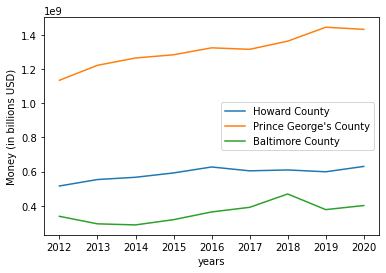

In [ ]:
years = ['2012','2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
howard_money = []
pg_money = []
bc_money = []
for i in range(2012,2021):
  howard_money.append(county_df.at[counties_Dict['HOWARD COUNTY PUBLIC SCHOOLS'], str(i)])
  pg_money.append(county_df.at[counties_Dict['PRINCE GEORGES\' COUNTY PUBLIC SCHOOLS'], str(i)])
  bc_money.append(county_df.at[counties_Dict['BALTIMORE COUNTY PUBLIC SCHOOLS'], str(i)])

howard_money

plt.plot(years, howard_money, label = "Howard County")
plt.xlabel("years")
plt.ylabel("Money (in billions USD)")

plt.plot(years, pg_money, label = "Prince George's County")
plt.xlabel("years")
plt.ylabel("Money (in billions USD)")

plt.plot(years, bc_money, label = "Baltimore County")
plt.xlabel("years")
plt.ylabel("Money (in billions USD)")
plt.legend()

# **Analysing Baltimore County** 

Specifically looking at Baltimore county, we can see what the exact increase of spending over the last 8 years was. Despite the large amount of spending done in 2018, the growth of spending does not change much through 2012 to 2020. There was a considerable spike in transaction amount in 2018, but the other 7 years of spending stay consisitently around 3.75 hundred million.

[337662222.53000015,
 293554302.6399997,
 287203397.6999999,
 318034046.50999945,
 363188667.24,
 390308315.07999974,
 468551006.9300005,
 376880650.4800001,
 400793489.2399999]

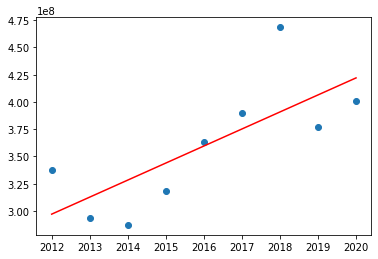

In [ ]:
#code for regression line
year_nums = []
for year in years:
  year_nums.append(int(year))
plt.scatter(year_nums, bc_money)

poly = np.polyfit(year_nums, bc_money,1)
poly1d_fn = np.poly1d(poly)
x_line = np.linspace(min(year_nums), max(year_nums))
y_line = poly1d_fn(x_line)
plt.plot(x_line,y_line, c = 'red')


bc_money

Continuing to focus on Baltimore County, we wanted to use our regression line to predict the amount of spending through the next 10 years. The spending on public school for the next 10 years will steadily increase, which can be a very hopeful positive for the families looking for confidence in their children's education.  

In [ ]:
#this will predict how much Baltimore County will be spending on education in 10 years from where the data stops, 2020
#slope of regression line
length = len(x_line)
slope = (y_line[length - 1] - y_line[0])/9
y_line[length-1] + slope * 10
 
prediction_table = pd.DataFrame({"Year": [], "Predicted Spending": []})
 
prediction_table
years = list(range(2021,2031))
 
count = 1
for i in years:
 prediction = y_line[length-1] + slope * count
 count += 1
 prediction_table.loc[len(prediction_table.index)] = [i, prediction]
 
prediction_table


,Year,Predicted Spending
0,2021.0,4.359619e+08
1,2022.0,4.498504e+08
2,2023.0,4.637389e+08
3,2024.0,4.776274e+08
4,2025.0,4.915159e+08
5,2026.0,5.054043e+08
6,2027.0,5.192928e+08
7,2028.0,5.331813e+08
8,2029.0,5.470698e+08
9,2030.0,5.609583e+08


This table predicts the amount of money Baltimore County Schools will spend over the next ten years using the slope of the regression line. We figured this prediction would not be very acurate for longer spans of time since the data we collected only spanned ten years initially and from other extraneous variables such as inflation. By 2030, Baltimore County is predicted to be spending over 560 million dollars for their education

We next wanted to exctract data regardging the counties population so that we may compare it to the educational spending data that we have gathered

In [ ]:
#https://worldpopulationreview.com/us-counties/states/md
#data on each Maryland count's population
 
county_pop_df = pd.read_csv('https://raw.githubusercontent.com/samfcb28/Maryland_Education_Spending/main/countypop.csv')

#Sort by county name to line up with the county_df data on county amounnt spent
county_pop_df = county_pop_df.sort_values(by = ['CTYNAME'], ascending = False)
county_pop_df.reset_index(drop=True, inplace=True)
county_pop_df


,CTYNAME,pop2021,GrowthRate,popDensity
0,Worcester County,52908,2.7340,127.5243
1,Wicomico County,104739,5.8269,252.4527
2,Washington County,151835,2.7850,365.9683
3,Talbot County,37395,-1.2778,90.1333
4,St. Mary's County,115090,8.8208,277.4017
5,Somerset County,25636,-3.1288,61.7905
6,Queen Anne's County,50847,6.3611,122.5566
7,Prince George's County,908743,4.8849,2190.3454
8,Montgomery County,1055110,8.1496,2543.1341
9,Kent County,19398,-4.0321,46.7550


This chart displays each county in Maryland (including Balitmore City) and information on their populations. This data will be combined with educational spending data for comparison. 

Retreived from: https://worldpopulationreview.com/us-counties/states/md

In [ ]:
#Make a df combining the Amounts with population
county_2020_df = county_df.copy()
county_2020_df = county_2020_df[['County','2020']]


county_2020_dict = {}
#create dictionary of counties and their row number
for index, row in county_2020_df.iterrows():
  county_2020_dict[county_df.at[index, 'County']] = index


#rename Garrett (get rid of Oakland)
county_2020_df.at[county_2020_dict['OAKLAND, GARRETT COUNTY PUBLIC SCHOOLS'], 'County'] = 'GARRETT COUNTY PUBLIC SCHOOLS'

#Sort by County name to match with population chart
county_2020_df = county_2020_df.sort_values(by = ['County'], ascending = False)
county_2020_df.reset_index(drop=True, inplace=True)

#concat dataframes
pop_cost_df = pd.concat([county_2020_df, county_pop_df], axis = 1)
pop_cost_df = pop_cost_df.drop(['CTYNAME', 'GrowthRate', 'popDensity'], axis = 1)
pop_cost_df = pop_cost_df.rename(columns={'2020': 'Amount', 'pop2021': 'Population'})

#sort by population spent for graphing purpose
pop_cost_df = pop_cost_df.sort_values(by = ['Population'], ascending = False)
pop_cost_df.reset_index(drop=True, inplace=True)
pop_cost_df

,County,Amount,Population
0,MONTGOMERY COUNTY PUBLIC SCHOOLS,6.698629e+08,1055110
1,PRINCE GEORGES' COUNTY PUBLIC SCHOOLS,1.433491e+09,908743
2,BALTIMORE COUNTY PUBLIC SCHOOLS,4.007935e+08,826392
3,ANNE ARUNDEL CO. PUBLIC SCHOOLS,9.498662e+08,586656
4,BALTIMORE CITY SCHOOLS,4.610254e+08,575584
5,HOWARD COUNTY PUBLIC SCHOOLS,6.299904e+08,331828
6,FREDERICK COUNTY PUBLIC SCHOOLS,4.162589e+08,268755
7,HARFORD COUNTY PUBLIC SCHOOLS,2.837665e+08,258559
8,CARROLL COUNTY PUBLIC SCHOOLS,3.193801e+07,168807
9,CHARLES COUNTY PUBLIC SCHOOLS,1.802266e+08,166819


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd98d820a50>,
      dtype=object)

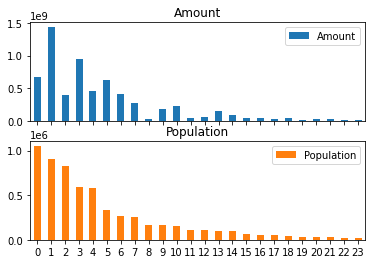

In [ ]:
pop_cost_df.plot.bar(rot=0, subplots=True)

With the counties organized by descending population, it is clear that though the counties with the higher populations overall have highest educational spending, although it is not directly correlated. Prince George's County has less population than Montgomery yet much greater educational spending. The same is true with Baltimore County having more people but spending less than Anne Arundel. 

In [ ]:
#record the largest single transaction for each county in 2020
 
#isolate original dataframe to only most recent data
df_2020 = df.copy()
df_2020 = df_2020[df_2020['Fiscal Year'] == 2020]
df_2020.reset_index(drop=True, inplace=True)
 
#Will use the counties_Dict to store data in arrays pertaining to largest amount and who each counth paid
top_spent = [] #amount
spent_name = [] #payee name
 
#fill with empty values
for x in range(0,24):
 top_spent.append(0.0)
for x in range(0,24):
 spent_name.append('')
 
#compare each amount to the stored largest transaction for each school district
for index, row in df_2020.iterrows():
 if top_spent[counties_Dict.get(str(df_2020.at[index, 'Agency Name']))] < float(df_2020.at[index, 'Amount']):
   top_spent[counties_Dict.get(str(df_2020.at[index, 'Agency Name']))] = float(df_2020.at[index, 'Amount'])
   spent_name[counties_Dict.get(str(df_2020.at[index, 'Agency Name']))] = str(df_2020.at[index, 'Payee Name'])
key_list = list(counties_Dict.keys())
val_list = list(counties_Dict.values())
print('Each School District Largest Transaction in 2020:')
for x in range (0,24):
 print('County: ' + str(key_list[x]) + ' Paying: ' + str(spent_name[x]) + ' Amount: ' + str(top_spent[x]))


Each School District Largest Transaction in 2020:
County: CALVERT COUNTY PUBLIC SCHOOLS Paying: CAREFIRST BLUECROSS BLUESHIELD Amount: 27814010.48
County: ANNE ARUNDEL CO. PUBLIC SCHOOLS Paying: CAREFIRST BLUE CROSS Amount: 204008627.95
County: CHARLES COUNTY PUBLIC SCHOOLS Paying: CAREFIRST BLUE CROSS BLUE SHIELD Amount: 37348024.04
County: QUEEN ANNE'S COUNTY PUBLIC SCHOOLS Paying: CAREFIRST OF MARYLAND Amount: 1622226.76
County: ST. MARY'S COUNTY PUBLIC SCHOOLS Paying: SMECO Amount: 2829135.2
County: WICOMICO COUNTY PUBLIC SCHOOLS Paying: WHITING-TURNER CONTRACTING COMPANY Amount: 13445008.3
County: BALTIMORE CITY SCHOOLS Paying: CAREFIRST BC/BS Amount: 82459344.16
County: HOWARD COUNTY PUBLIC SCHOOLS Paying: Kelly And Associates Financial Amount: 184229399.0
County: HARFORD COUNTY PUBLIC SCHOOLS Paying: CAREFIRST BC/BS Amount: 108728851.6
County: WORCESTER COUNTY BOARD OF ED Paying: NICKLE ELECTRICAL COMPANIES Amount: 5014710.16
County: OAKLAND, GARRETT COUNTY PUBLIC SCHOOLS Paying

In 2020, most counties in Maryland's largest single transaction was related to insurance or banking. As former Baltimore County students, seeing the data compute Hewlett Packard as the largest transaction is not surprising. We were familiar with the rapid shift to online learning under superintendent Dr Dallas Dance. This technological move while strong in principal left the students and teachers with small, underperforming, and expensive laptops and came under heavy critisicm from teachers, staff, and students. Dance was later convicted on criminal charges related to taking money from companies working with schools without reporting it. In 2020, while scaling back the initial plan, Baltimore County Public Schools is still working with the brand despite critism.

https://www.hp.com/us-en/hp-news/press-release.html?id=1721308#.Yb-NO33MJr1

https://www.wbaltv.com/article/former-bcps-superintendent-dallas-dance-sentenced/19871145#

https://www.baltimoresun.com/education/bs-md-co-laptop-changes-20190517-story.html


# **Conclusion**

Despite its size, Maryland is a very populous state, and there have been very great strides and public education equality in spending and funding. The reasons for differences in data and spending through the years can be very complex and have a multitude of variables that would be nearly impossible to account, but by using techniques learned in CMSC320 we are able to make sense of large data like this. We are able to understand, sort, analyse, and predict the data, which we would have not been able to do just 3 months ago. Looking at the charts, and tables we hope that a potential new resident of Maryland can make a educated decision of where they would like to live. This data can be also helpful for current residents who would like to possibly see change if they are not happy with their county's public funding.  